# Capstone 1 In-Depth Analysis

My question for my Capstone project is to see if we can use survey data to create categorize the respondents based on how they answered questions on political preferences in the United States.

This document will be an in-depth analysis of the data using dimensionality reduction and unsupervised learning. The dataset in question can be found at the following website, which also contains a link to download the documentation as a pdf:
https://www.voterstudygroup.org/publication/2018-voter-survey-1

The documentation also contains a frequency table for each question in the survey.

My primary goals for this document are:
1. Reduce the dimensionality of the data using multiple component analysis (MCA).
2. Utilze the K-means clustering algorithm to create groups for the respondents.
3. Dig further into the newly created clusters to find insights and how they differentiate from one another.



# 1. Importing Data and Libraries

In [1]:
import pandas as pd
import prince
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats as ss
import seaborn as sns
import warnings
warnings.filterwarnings(action='once')
%matplotlib inline

In [2]:
data = pd.read_csv("CleanedData.csv", header=[0,1,2,3], index_col=0)
data.head()

Col_name,case_identifier,caseid,weight_panel,weight_latino,weight_18_24,weight_overall,cassfullcd,add_confirm_2018,votereg_2018,votereg_f_2018,...,faminc_baseline,prim12_baseline,post_inputstate_2012,post_turnout12_2012,post_turnout_method12_2012,post_presvote12_2012,post_pid7_2012,post_pid3_2012,post_ideo5_2012,post_newsint_2012
Year,Other,Other,Other,Other,Other,Other,Other,2018,2018,2018,...,2011,2011,2012,2012,2012,2012,2012,2012,2012,2012
Type,ID,ID,Weight,Weight,Weight,Weight,ID,Cat,Cat,Cat,...,Cat_O_DN,Cat,Cat,Cat,Cat,Cat,Cat_O_DN,Cat,Cat_O_DN,Cat_O_DN
Section,ID,ID,Weight,Weight,Weight,Weight,ID,ID,ID,ID,...,RespInfo,Voting,ID,Voting,Voting,Voting,PolIden,PolIden,PolIden,Engagement
0,779.0,382484815.0,0.502544,NaN,NaN,0.359510,602.0,1.0,1.0,1.0,...,6.0,1.0,32.0,5.0,4.0,1.0,2.0,1.0,3.0,1.0
1,2108.0,382162624.0,0.388691,NaN,NaN,0.736387,405.0,1.0,1.0,1.0,...,8.0,2.0,4.0,5.0,4.0,2.0,7.0,2.0,4.0,1.0
2,2597.0,382165114.0,0.684193,NaN,NaN,0.631656,5506.0,1.0,1.0,1.0,...,5.0,1.0,55.0,5.0,4.0,2.0,7.0,2.0,3.0,1.0
3,4460.0,382338436.0,0.322488,NaN,NaN,0.488005,4828.0,2.0,1.0,1.0,...,10.0,2.0,48.0,5.0,4.0,2.0,7.0,2.0,4.0,1.0
4,5225.0,382487100.0,0.594111,NaN,NaN,0.513802,602.0,1.0,1.0,1.0,...,4.0,1.0,6.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0


## 1.1. Background Info

### Section

This document heavily utilizes 'Section' part of each questions, which indicates the subject matter of the question. It was created by going through manually and labeling each question in a seperate csv file, so their is some discretion and subjectivity to which questions are in which category. We will be using the Section grouping to reduce the dimensionality of the dataset later in this document. Here is a brief description and example of each Section in the data:

1. **AmericanID**: What makes us American (*ambornin_2016*)
2. **Blame**: Who bears responsibility for events since Trump became president (*blame_trump_2017*)
3. **Cultural**: LGBTQ+ issues, abortion, and politial correctness (*abortview3_2016*)
4. **Direction**: How people feel about the direction of the country (*track_2018*)
5. **Economics**: Economic questions on subjects like regulation, or redistribution (*govt_reg_2017*)
6. **Egalitarian**: Extent we should have and feasiblity of a more egalitarian society (*egalitarian_fewer_problems_2017*)
7. **Elections**: How elections should be conducted (*elect_2018*)
8. **Engagement**: How engaged people are in political news (*newsint_2018*)
9. **FavTemp**: Favoribility temperatures from 1-100 on various groups (*ft_black_2017*)
10. **HeadtoHead**: Head to head preferences of politial figures (*Clinton_Rubio_2016*)
11. **Health**: Health Care questions (*univhealthcov_2016*)
12. **ID**: Identifing info for survey purposes, or geographic info (*inputstate2_2018*)
13. **Immigration**: Immigration questions (*immi_naturalize_2018*)
14. **Institutions**: Confidence in specific American institutions (*inst_court_2018*)
15. **IssueImportance**: How important various issues are to respondent (*imiss_a_2017*)
16. **Knowledge**: Gauge political knowledge (pk_ideo_baseline)
17. **MediaComsump**: Which TV programs are being watched (*morn_show_1_baseline*)
18. **MiscIssue**: Miscellanious political issues (*deathpenalty_baseline*)
19. **Muslim**: Views on Muslims (*muslim_describe_terrorism_2017*)
20. **OrgMembership**: Questions on if belong to various organizations (*org_membership_1_baseline*)
21. **Parties**: Feelings on the 2 main parties and potential 3rd parties (*parties_2018*)
22. **PartyAgendaD**: Feelings on the Democratic party platform on various issues (*PARTY_AGENDAS_D1_2016*)
23. **PartyAgendaR**: Feelings on the Republican party platform on various issues (*PARTY_AGENDAS_R1_2016*)
24. **PersonalRepFeelings**: Feelings on personal US congressional representitives/senators (*CR_touch_2018*)
25. **PolContrib**: Political contributions (*polcontr_1_baseline*)
26. **PolIden**: Political self-identity (*pid3_2017*)
27. **Pol_Approval**: Approval/favorability of various political figures (*fav_romn_baseline*)
28. **Pol_Views**: Respondent impressions on various political figures (*likeobama_baseline*)
29. **Proud**: Patriotism of respondent (amcitizen_2016)
30. **Race**: Questions on race generally and about specific racial groups (*race_deservemore_2016*)
31. **RespInfo**: Respondent info that aren't about political preferences/habits such as age/employment (*marstat_2016*)
32. **RiggedOccur**: Questions about if/how elections/economy is rigged (*occur1_2018*)
33. **Russia**: Trump/Russia investigation (*russA_2018*)
34. **Sex/MeToo**: Questions on gender, sexism, and the #MeToo movement (*sexism3_2018*)
35. **Social_Conformity**: Questions on child rearing (*SOCIAL_CONFORMITY_1_2016*)
36. **Systems/Democracy**: Feelings about institutional democracy (*systems_leader_2018*)
37. **Taxes**: Questions on tax policy (*tax_2018*)
38. **Trade**: Trade questions (*tradepolicy_2017*)
39. **TrumpPromise**: Importance of Trump campain promises (*promise_parent_2017*)
40. **Trust**: Feelings of trust in various institutions (*trustgovt_2017*)
41. **Voting**: Who respondents voted for or hypotheticaly would vote for in various elections (*pp_primary16_2016*)
42. **Weight**: Weights of respondents for survey purposes (*weight_panel*)

And here are the number of columns in each Section:

In [3]:
data.sum().groupby(by='Section').count()

Section
AmericanID               8
Blame                    5
Cultural                10
Direction               28
Economics               12
Egalitarian              4
Elections               16
Engagement               7
FavTemp                 40
HeadtoHead               4
Health                   9
ID                      17
Immigration             31
Institutions             8
IssueImportance         61
Knowledge               13
MediaConsump            45
MiscIssue               18
Muslim                  13
OrgMembership           22
Parties                  8
PartyAgendaD            12
PartyAgendaR            12
PersonalRepFeelings      9
PolContrib               7
PolIden                 32
Pol_Approval            40
Pol_Views               13
Proud                    6
Race                    20
RespInfo               142
RiggedOccur             11
Russia                   9
Sex/MeToo               24
Social_Conformity        4
Systems/Democracy       16
Taxes               

# 2. Data Preperation

In [4]:
#This function just is a simplified way to get a slice from a multiindexed column
get_slice = lambda name, level: data.loc[:,data.columns.get_level_values(level)==name].droplevel(level=[1,2,3],axis=1)

### Dropping Sections

Here we drop a few of the sections to create the final input data. 'ID' and 'Weight' don't tell us about the political views of the respondnets, so they get dropped. 'RespInfo' doesn't tell us anything about political views either, but may be used to gain insight about the clusters once formed. Finally, the PartyAgendaR and PartyAgendaD sections do provide useful information, but caused some problems with the clustering algorithm because of the number of blank responses. Basically, the algorithm created 2 clusters whose only distiction was if the respondnet answered the PartyAgenda questions or not. This just added confusion, so those sections are ultimately dropped. 

In [5]:
X = data.drop(['ID', 'Weight', 'RespInfo', 'PartyAgendaR', 'PartyAgendaD'], level=3, axis=1)

#Transforming to str helps python identify the data as categories and not numerals
X  = X.astype(str)

sectionlist = X.columns.get_level_values(3).unique().sort_values()
X = X.droplevel(level=[1,2,3],axis=1)
X.head()

Col_name,vote18_2018,trumpapp_2018,trumpfeel_2018,fav_trump_2018,fav_ryan_2018,fav_obama_2018,fav_hrc_2018,fav_sanders_2018,fav_putin_2018,fav_schumer_2018,...,polcontr_6_baseline,polcontr_7_baseline,prim12_baseline,post_turnout12_2012,post_turnout_method12_2012,post_presvote12_2012,post_pid7_2012,post_pid3_2012,post_ideo5_2012,post_newsint_2012
0,2.0,4.0,4.0,4.0,4.0,1.0,2.0,1.0,4.0,1.0,...,2.0,2.0,1.0,5.0,4.0,1.0,2.0,1.0,3.0,1.0
1,1.0,1.0,1.0,1.0,2.0,4.0,4.0,3.0,3.0,3.0,...,2.0,1.0,2.0,5.0,4.0,2.0,7.0,2.0,4.0,1.0
2,2.0,4.0,4.0,4.0,4.0,2.0,2.0,8.0,4.0,2.0,...,2.0,1.0,1.0,5.0,4.0,2.0,7.0,2.0,3.0,1.0
3,1.0,2.0,3.0,2.0,2.0,3.0,4.0,3.0,4.0,4.0,...,2.0,2.0,2.0,5.0,4.0,2.0,7.0,2.0,4.0,1.0
4,2.0,4.0,4.0,4.0,4.0,1.0,1.0,3.0,4.0,2.0,...,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0


# 3. Dimensionality Reduction

As it stands now, the input data has 642 features of categorical variables, which is a lot to handle. We want to reduce the number of features in order to trim down the unnecessary or redundant information in the data. To this end, we can perform MCA on each Section of the data to reduce it to each of its core components. This allows for more interpretable components while still trimming the data significantly. It also converts the data into continuous variables instead of discrete, which is more conducive to plotting.

### 3.1 Choosing the number of Components for each section

We need to make sure we choose enough components to capture the essential information in the data, but not too many to add unnecessary noise. Therefore we can look at the explained inertia of each component and see where the cumulative difference begins to shrink and choose the cutoff there. This is known colloquially as the 'elbow' method. Here is an example on one of the Sections.

#### 3.1a Example

In [6]:
#Getting the slice of the Section from the data
section = "AmericanID"
Xsection = get_slice(section,3).astype(str)

#Getting the MCA object for the chosen section. 
mca = prince.MCA(n_components=min(10,Xsection.shape[1]), random_state=111)
mca = mca.fit(Xsection)

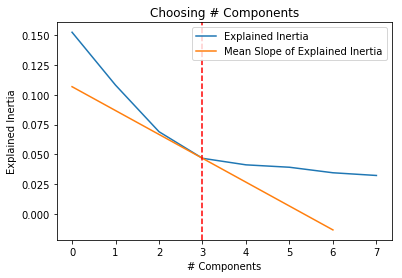

In [7]:
#Here is the explained inertia of each component. 
#The explained inertia represents the percentage of the inertia each principal component contributes.
slopes = abs(np.diff(mca.explained_inertia_))

#We choose our cutoff where the slope becomes less than the average slope
#In this case it is 3
cutoff = slopes[slopes>np.mean(slopes)][-1]
best_n = np.where(slopes == cutoff)[0][0]+1

#We put the floor at 2 to capture the DK/BLANK component. This will make more sense later on.
best_n = max(best_n, 2)


plt.plot(mca.explained_inertia_)
y = -np.linspace(0,len(slopes),len(slopes))*np.mean(slopes)+mca.explained_inertia_[best_n]
plt.plot(y+(mca.explained_inertia_[best_n]-y[best_n]))
plt.axvline(best_n,color='r',linestyle='--')
plt.title("Choosing # Components")
plt.xlabel("# Components")
plt.ylabel("Explained Inertia")
plt.legend(["Explained Inertia", "Mean Slope of Explained Inertia"])
plt.show()

#### 3.1b Applying to all Sections

Now we apply the above example to each Section in the data. We also store the inertias in a dictionary to use later.

In [8]:
print("Section n_components")
inertia_dict = {}

for section in sectionlist:
    Xsection = get_slice(section,3).astype(str)
    mca = prince.MCA(n_components=min(10,Xsection.shape[1]), random_state=111)
    mca = mca.fit(Xsection)
    inertia_dict.update({section: mca.explained_inertia_})
    slopes = abs(np.diff(mca.explained_inertia_))
    cutoff = slopes[slopes>np.mean(slopes)][-1]
    best_n = np.where(slopes == cutoff)[0][0]+1
    best_n = max(best_n, 2)
    print(section, "Section Questions:",Xsection.shape[1], "# Components:", best_n)
    
    mca = prince.MCA(n_components=best_n, random_state=111)
    mca = mca.fit(Xsection)
    
    newaddition = pd.DataFrame(data=np.array(mca.transform(Xsection)),\
                                     columns = [section+"_"+str(component_num) for component_num in range(1,best_n+1)])
    
    if section == sectionlist[0]:
        AllComponents = newaddition
    else:
        AllComponents = AllComponents.join(newaddition)

AllComponents.head()

Section n_components
AmericanID Section Questions: 8 # Components: 3
Blame Section Questions: 5 # Components: 2
Cultural Section Questions: 10 # Components: 3
Direction Section Questions: 28 # Components: 4
Economics Section Questions: 12 # Components: 4
Egalitarian Section Questions: 4 # Components: 3
Elections Section Questions: 16 # Components: 4
Engagement Section Questions: 7 # Components: 2
FavTemp Section Questions: 40 # Components: 6
HeadtoHead Section Questions: 4 # Components: 2
Health Section Questions: 9 # Components: 2
Immigration Section Questions: 31 # Components: 2
Institutions Section Questions: 8 # Components: 5
IssueImportance Section Questions: 61 # Components: 5
Knowledge Section Questions: 13 # Components: 2
MediaConsump Section Questions: 45 # Components: 4
MiscIssue Section Questions: 18 # Components: 3
Muslim Section Questions: 13 # Components: 3
OrgMembership Section Questions: 22 # Components: 2
Parties Section Questions: 8 # Components: 5
PersonalRepFeelings

,AmericanID_1,AmericanID_2,AmericanID_3,Blame_1,Blame_2,Cultural_1,Cultural_2,Cultural_3,Direction_1,Direction_2,...,TrumpPromise_2,TrumpPromise_3,Trust_1,Trust_2,Trust_3,Trust_4,Volunteer_1,Volunteer_2,Voting_1,Voting_2
0,0.521168,0.459816,-0.143621,-0.078632,0.416762,0.877315,-0.034975,0.226455,0.575131,-0.390018,...,-0.094567,0.087733,-0.010063,0.512975,-0.617131,-0.019101,0.164406,-0.311918,0.854283,-0.349438
1,-0.189671,0.330040,0.392478,-0.086399,-0.294962,-0.760445,-0.244845,-0.343495,-0.746954,-0.289659,...,-0.100864,0.138257,-0.124430,0.151523,0.371556,-0.383260,0.287902,0.204462,-0.876116,-0.200519
2,-0.159144,-0.234740,0.059542,-0.075197,-0.022221,0.653566,-0.019801,-0.156124,0.369448,-0.086281,...,-0.090451,-0.083130,-0.080578,-0.095278,-0.611938,0.451490,-0.292560,0.038753,0.661780,-0.333478
3,-0.167120,-0.344660,-0.491326,-0.077027,0.651740,-0.937822,-0.163693,0.201177,-0.493031,-0.315358,...,-0.114454,0.174640,-0.062153,-0.425322,0.314436,-0.226196,0.050515,0.322819,-0.869046,-0.206753
4,-0.204878,0.558979,-0.411794,-0.077583,0.423367,1.124959,-0.434784,0.179955,0.484038,-0.376183,...,-0.098897,0.645853,-0.145514,0.947414,0.460575,0.153712,-0.292560,0.038753,0.861373,-0.353798


Now we are down to 123 columns from 640, which is a huge difference. Additionally, everything is continuous instead of discrete so we can use the clustering algorithm.

### 3.2 Component Examination

Now that we have all the components, we can see how each component ties back to the original questions in the survey. Below is a correlation matrix of sorts that shows these relationships for the 'AmericanID' Section

In [9]:
#This function creates the correlation matrix for components and questions
def coltocomp_correlation(section,qa_interpretations=None,plot = False):
    section_components = AllComponents.loc[:,AllComponents.columns.str.startswith(section)]
    n = section_components.shape[1]
    corr = section_components.join(pd.get_dummies(get_slice(section,3).astype(str))).corr().iloc[n:,:n]
    
    if plot==False: return corr

    fsize_row = min(20,max(5,corr.shape[0]-6))
    fsize_col = corr.shape[0]/1.3
    plt.figure(figsize = (fsize_row,fsize_col))

    if qa_interpretations is not None:
        corr.index = qa_interpretations
    
    ax = sns.heatmap(corr, cmap="coolwarm", annot=True)
    plt.title(section+" Componets")
    plt.xlabel("")
    plt.ylabel("")
    plt.show()
    return

The "AmericanID" section asks a series of questions about what characteristics makes somebody 'American'. The respondent then answers on a scale of 'Very Important' or 'Not at all Important' about that characteristic.

In [10]:
test_section = "AmericanID"

AmericanID_Qs = ["Born in USA", "American Citizen", "Lived in USA Most of Life", "Speak English",\
                 "Christian", "Respect Institutions/Laws", "White", "Accept Diversity"]
AmericanID_As = ["Very", "Fairly", "Not Very", "Not at All", "DK/Blank"]
qa_interpretations = [q+" ("+a+")" for q in AmericanID_Qs for a in AmericanID_As]

The chart below shows how each AmericanID component correlates to each question/answer pair in the original survey. Each row is a question/answer pair (e.g. 'Born in USA (Very)' means the respondent answered that it is 'Very Important' to have been 'Born in the USA' to be American). Each column represents the 3 components given from the MCA. And each entry represents the correlation between the component and the question/answer pair.

AmericanID Explained_Inertia [0.15239133426399418, 0.10809175591225265, 0.06907017624628721]


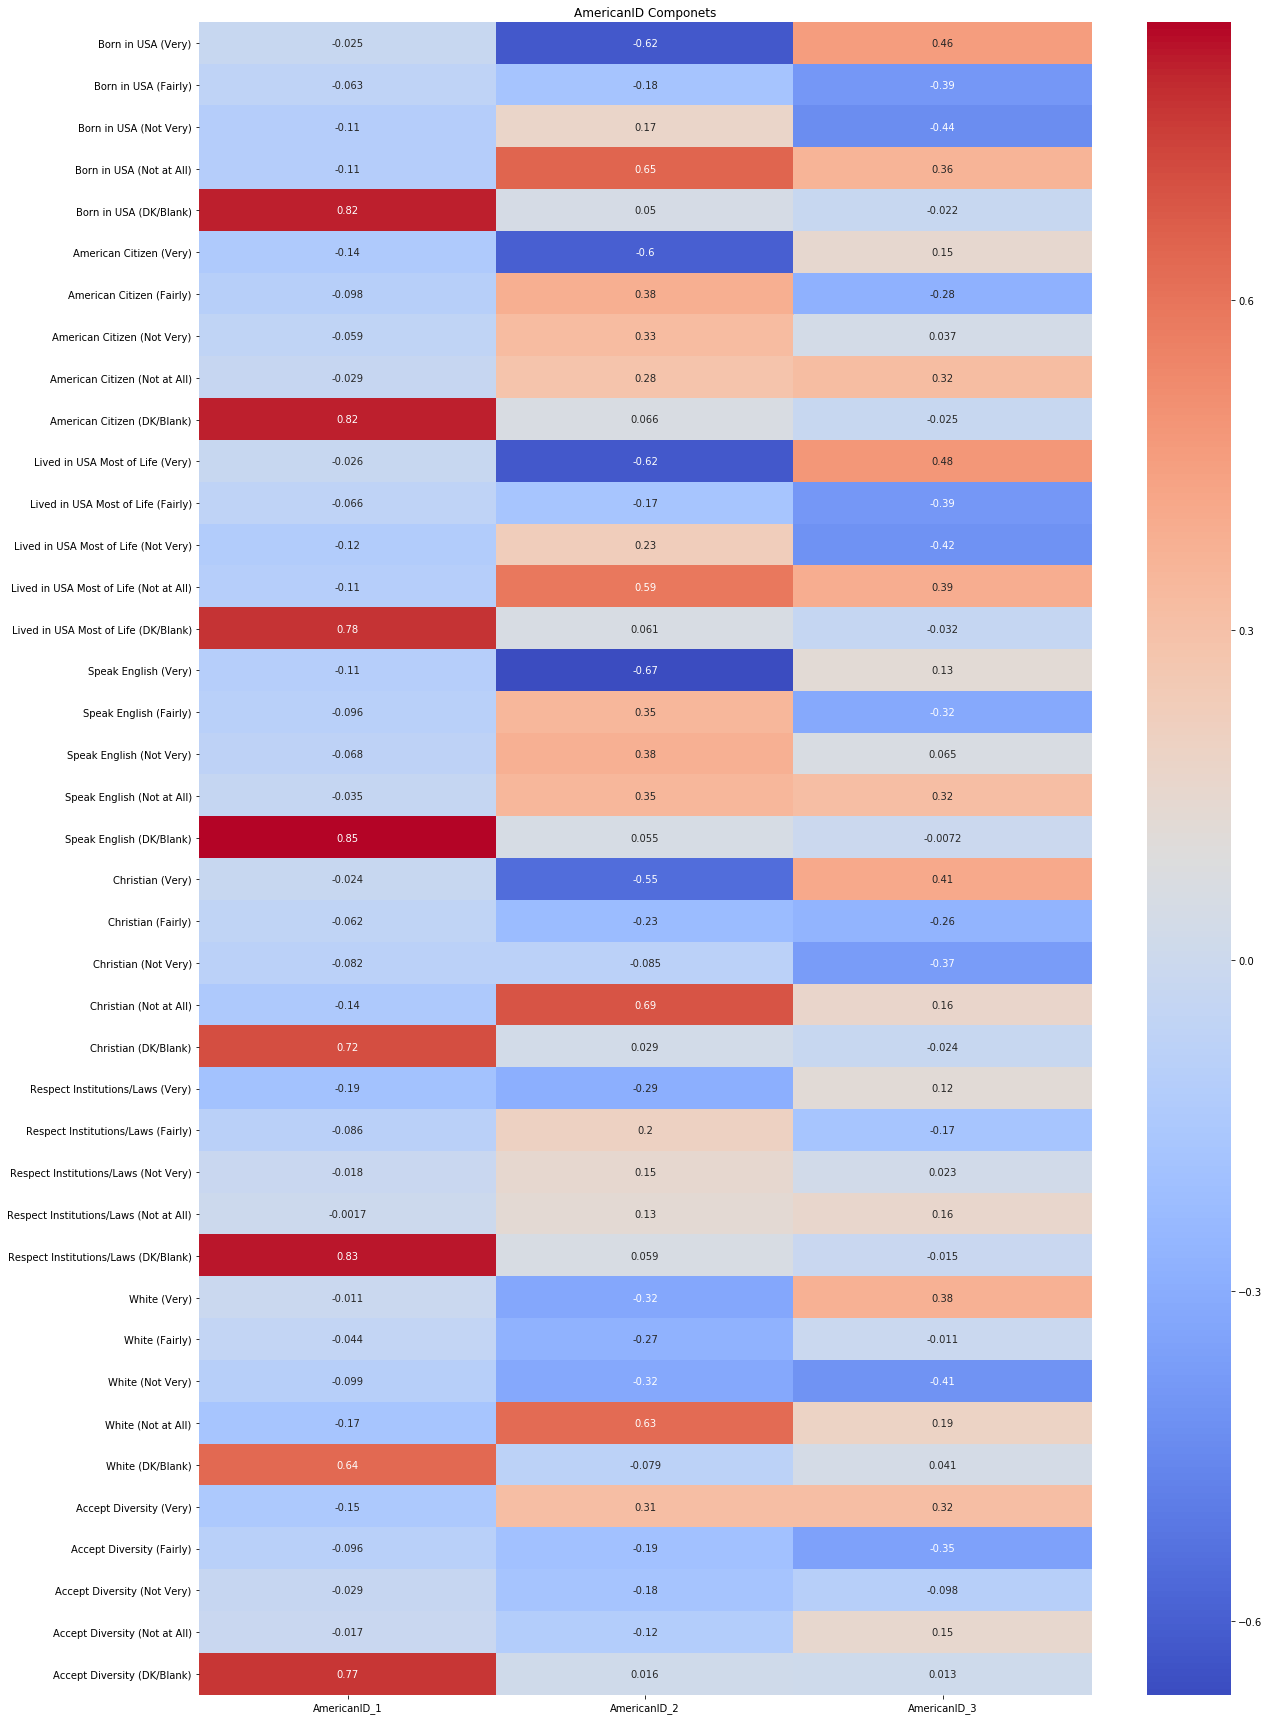

In [11]:
num_Components = AllComponents.loc[:,AllComponents.columns.str.startswith(test_section)].shape[1]
print(test_section+" Explained_Inertia",inertia_dict[test_section][:num_Components])
coltocomp_correlation(test_section, qa_interpretations=qa_interpretations, plot=True)


As you can see, the first component is almost entirely related to if the respondent answered this portion of the survey. The second component seems to correlate to a more inclusive mindset of being an American, while the third isn't as clear. Take note of this first component, because it causes some problems later on.

### 3.3 Dropping 'Section-skipping' components

As you saw above, the component 'AmericanID_1' correlated with leaving all the questions blank in that section. What eventually happens in the clustering algorithm is that it creates clusters almost entirely based on this 'Section-skipping' components. This doesn't contribute anything to understanding the data. Therefore, I make the decision to drop this component and other 'Section-skipping' components that confuse the algorithm. This isn't an exhaustive list of 'Section-skipping' components, but this was the minimum number required to get the algorithm to not create entire clusters heavily based on these components.

If you want to see exactly what happens to the algorithm when these components are included, take a look at the 'Extra Analysis Code' notebook. 

In [12]:
AllComponents = AllComponents.drop(["PolContrib_1","OrgMembership_1","PersonalRepFeelings_1","Blame_1","AmericanID_1",\
                                    "Trade_1", "Egalitarian_2", "Muslim_1", "Parties_2", "RiggedOccur_1"], axis=1)

# 4. Generating Clusters with K-means

## 4.1 Choosing k

Now that I have the components ready, I'm able to perform a K-means clustering algorithm on the components. I choose k clusters based on an examination of the how the inertia changes based on different values of k, but also based on how clean the results came out with some trial and error. I end up choosing k=9 clusters. 

C:\Users\James\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 112 from C header, got 124 from PyObject
  return f(*args, **kwds)
C:\Users\James\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 112 from C header, got 124 from PyObject
  return f(*args, **kwds)
C:\Users\James\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 112 from C header, got 124 from PyObject
  return f(*args, **kwds)


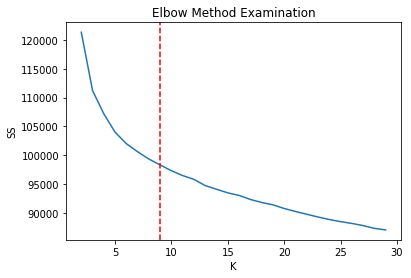

In [13]:
from sklearn.cluster import KMeans
Ks = range(2,30)
inertias = []

for K in Ks:
    kmeans = KMeans(n_clusters=K, random_state=111).fit(AllComponents)
    inertias.append(kmeans.inertia_)


plt.plot(Ks, inertias)
plt.axvline(9,color='r',linestyle='--')
plt.title("Elbow Method Examination")
plt.xlabel("K")
plt.ylabel("SS")
plt.show()

## 4.2 Final K-means results

I run the final Kmeans with k=9 to get the final clusters. Additionally, I get a correlation table of the new labels to each component to see which labels correspond to each component and to what degree and direction. 

In [14]:
bestK = 9
kmeans = KMeans(n_clusters=bestK, random_state=111).fit(AllComponents)
componentlabeled_wdummies = AllComponents.join(pd.get_dummies(kmeans.labels_))

#Getting a table to show how closely each label is to each component
corr_labels = componentlabeled_wdummies.corr().iloc[:-bestK,-bestK:,]
corr_labels

,0,1,2,3,4,5,6,7,8
AmericanID_2,-0.060057,-0.074953,-0.279022,-0.112282,-0.025285,0.531129,-0.236476,0.207745,-0.113289
AmericanID_3,0.014989,-0.092243,0.142192,0.158949,-0.116625,0.183607,0.046581,-0.141205,-0.129430
Blame_2,0.026767,0.067634,-0.075506,0.111181,-0.149410,0.233929,-0.163035,0.215729,-0.265728
Cultural_1,-0.029621,0.058954,-0.234238,0.061817,-0.118265,0.555426,-0.356239,0.353221,-0.378597
Cultural_2,0.375256,0.172254,-0.017282,0.008185,0.055851,-0.203893,-0.149714,-0.000102,-0.083921
...,...,...,...,...,...,...,...,...,...
Trust_4,-0.001034,-0.060527,0.029026,0.331651,-0.148390,0.171784,0.010494,-0.012689,-0.230403
Volunteer_1,-0.110152,-0.073581,-0.082084,-0.045464,0.016951,0.071424,0.015204,0.043510,0.081312
Volunteer_2,-0.007999,0.010054,0.001195,0.017487,0.003614,-0.048704,0.031725,0.004051,-0.002100
Voting_1,0.047097,0.237730,-0.255383,0.243741,-0.227499,0.452687,-0.390070,0.406846,-0.512046


Here are the number of respondents in each of the K labels.

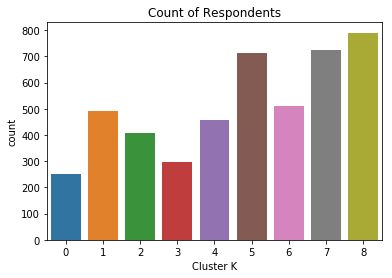

In [15]:
#Number of respondents in each of K labels
sns.countplot(kmeans.labels_)
plt.title("Count of Respondents")
plt.xlabel("Cluster K")
plt.show()

Below are the top 10 components with highest correlation to each label. This gives us a way to interpret what the K labels actually mean in reality.

In [16]:
for k in range(bestK):
    print("K =",k)
    print(corr_labels[k].sort_values(ascending=False).head(5))

K = 0
Pol_Approval_2    0.628212
Pol_Views_2       0.539617
Elections_1       0.505627
Engagement_1      0.480457
Proud_2           0.472792
Name: 0, dtype: float64
K = 1
Health_2          0.295586
Engagement_1      0.278022
Voting_1          0.237730
Knowledge_1       0.218785
Pol_Approval_2    0.216309
Name: 1, dtype: float64
K = 2
Systems/Democracy_1    0.396038
Muslim_2               0.315382
HeadtoHead_1           0.283855
Russia_1               0.275631
Parties_1              0.267596
Name: 2, dtype: float64
K = 3
Trust_4          0.331651
RiggedOccur_2    0.264073
Voting_1         0.243741
RiggedOccur_3    0.243380
Proud_3          0.212946
Name: 3, dtype: float64
K = 4
Russia_3          0.302474
HeadtoHead_1      0.234854
Sex/MeToo_2       0.212813
Pol_Approval_1    0.207076
HeadtoHead_2      0.204061
Name: 4, dtype: float64
K = 5
Race_1           0.619556
FavTemp_1        0.580683
Egalitarian_1    0.578756
Immigration_1    0.556410
Cultural_1       0.555426
Name: 5, dtype: flo

While we can't directly interpret these componets, we can tie each component back to the original question/answer pair like we did when we first created the components. Now we can get some direct interpretations of each of the clusters!

In [17]:
#Function that shows the top 10 question/answer combos for each component
def coltocomp_correlation_top10(component):
    n = int(component[-1])
    section = component[:-2]
    
    contribs = coltocomp_correlation(section,False).iloc[:,n-1]
    biggest10_impact = abs(contribs).sort_values(ascending=False).head(10).index
    return contribs[biggest10_impact]

#An example
coltocomp_correlation_top10("Systems/Democracy_1")

systems_army_2018_4.0                  -0.579666
systems_leader_2018_4.0                -0.578534
political_system_leader_2017_4.0       -0.563528
governed_2018_10.0                     -0.559549
political_system_army_2017_4.0         -0.559072
democracy_preference_2017_1.0          -0.554882
democracy_importance_2017_10.0         -0.551849
view1_2018_1.0                         -0.550312
systems_democ_2018_1.0                 -0.542889
political_system_democratic_2017_1.0   -0.541109
Name: Systems/Democracy_1, dtype: float64

## 4.3 Interpreting the Clusters

After some thorough examinations of the cluster interpretations using the above functions, and some of the functions below, I came to the following definitions of each of the clusters. They should be somewhat recognizable to the politically astute. 

0. **Moderate/Unengaged**: Don't follow political news closely and don't have strong political opinions.
1. **Lean Left**: Mainly have moderate views, but lean towards the political left in most respects.
2. **Populist Right**: Hold strict views on immigration and are distrustful towards large institutions.
3. **Christian Left**: Hold mostly mainstream views of political left, but are more likely to be African-American and Christian
4. **Lean Right**: Mainly have moderate views, but lean towards the political right in most respects.
5. **Far Left**: Hold views well to the left of most respondents.
6. **Far Right**: Hold views well to the right of most respondents.
7. **Left**: Hold views to the left of most respondents, but not as extreme as the Far Left.
8. **Classic Right**: Hold views to the right of most respondents, but are more open to immigration and free-markets than the Populist Right.

In [18]:
label_names = {0:"Moderate/Unengaged", 1:"Lean Left", 2:"Populist Right", 3:"Christian Left", 4:"Lean Right",\
               5:"Far Left", 6:"Far Right", 7:"Left", 8:"Classic Right"}

#Getting the order for them to plot on a left-right spectrum
label_order = ["Far Left", "Left", "Christian Left", "Lean Left", "Moderate/Unengaged",\
               "Lean Right", "Populist Right", "Classic Right", "Far Right"]

#Assigning the label names to the original data
data['Label_num'] = kmeans.labels_
data['Label'] = data['Label_num'].map(label_names)

## 4.4 Mapping the Clusters to 2-D

How can we view these clusters in a 2-dimentional space? Similar to how we reduced the original questions to Section components, we can reduce the components as well! Instead of using MCA, we use Principal Component Analysis (PCA) since the MCA components are continuous and PCA works on continuous variables.

In [19]:
#Performing PCA on the components
pca_only2 = prince.PCA(n_components=2,\
                        n_iter=3,\
                        copy=True,\
                        check_input=True,\
                        engine='auto',\
                        random_state=111)

pca_only2 = pca_only2.fit(AllComponents)

Now that we have the 2 new Principal Componets, we can make a 2-D plot. Thankfully, the Prince library has a great way to do that with the 'plot_row_coordinates' function. https://github.com/MaxHalford/Prince#

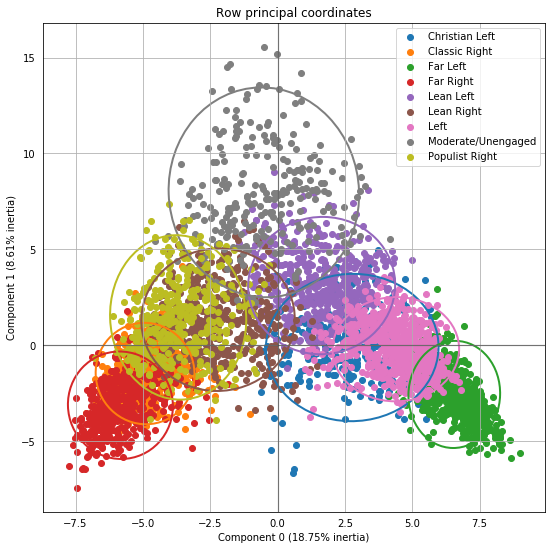

In [20]:
ax = pca_only2.plot_row_coordinates(AllComponents,\
                                      ax=None,\
                                      figsize=(9, 9),\
                                      x_component=0,\
                                      y_component=1,\
                                      labels=None,\
                                      color_labels=data["Label"],\
                                      ellipse_outline=True,\
                                      ellipse_fill=False,\
                                      show_points=True)

#### Interpretation of 2-D plot

Keep in mind that the colors of this plot are the labels derived from a much higher-dimentional space (116), so its quite remarkable how well it translates to 2-D. Also, these 2 Principal Components have a potential interpretation as well.

**Component 0 is a left-right axis**, with >0 on the political left and <0 on the political right (unintuitively).

**Component 1 is either a extreme/moderate axis or potentially an engaged/disengaged in politics axis**, with >0 being extreme/engaged and <0 being moderate/disengaged.

# 5. Analyzing the Clusters

Now that we have interpetations of the clusters, we can study these clusters in more detail. Specifically, we can see more characteristics of each cluster and how they answered key questions in the survey.

But first, let's look at the countplot again with labels this time.

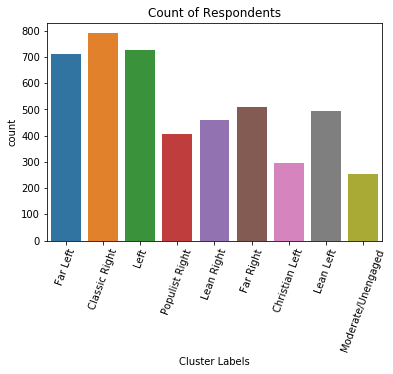

In [21]:
g = sns.countplot(data['Label'])
g.set_xticklabels(g.get_xticklabels(), rotation=70)
plt.title("Count of Respondents")
plt.xlabel("Cluster Labels")
plt.show()

### 5.1 Self-Identification

Our first look at these clusters is how each of the respondents self-identified themselves. These series of questions were basically 'Do you identify as _____? Yes or No?' with the blank being different political labels like 'Feminist' or 'Conservative'. The table below is what percentage of each group answered 'Yes' to identifying as the given label.

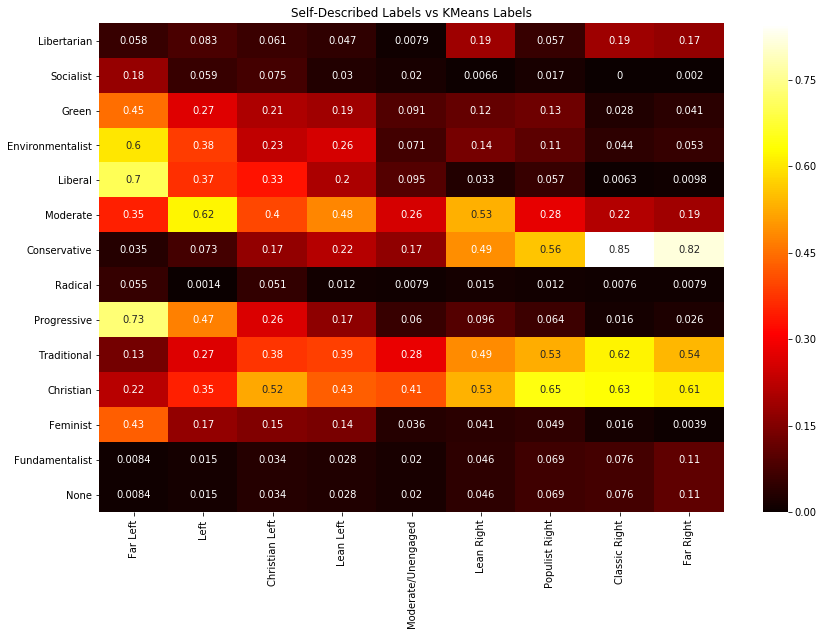

In [22]:
self_descr_labels = ["Libertarian", "Socialist", "Green", "Environmentalist", "Liberal", "Moderate", "Conservative",\
                         "Radical", "Progressive", "Traditional", "Christian", "Feminist", "Fundamentalist", "None"]

label_vs_selfdesc = pd.DataFrame(np.zeros((bestK, len(self_descr_labels))), columns=self_descr_labels)

x = np.array(data.loc[:,data.columns.get_level_values(0)=='Label_num']).ravel()
for i, l in enumerate(self_descr_labels):
    yname = "selfdescr_ccap_"+str(i+1)+"_baseline"
    
    if l=="None": yname = "selfdescr_ccap_99_baseline"
    else: y = np.array(data.loc[:,data.columns.get_level_values(0)==yname]).ravel()
    label_vs_selfdesc[l] = pd.crosstab(x,y).divide(np.array(pd.crosstab(x,y).sum(axis=1)),axis=0).iloc[:,0]

label_vs_selfdesc.index = label_vs_selfdesc.index.map(label_names)
label_vs_selfdesc = label_vs_selfdesc.loc[label_order,:]
fsize_col = label_vs_selfdesc.T.shape[1]
fsize_row = label_vs_selfdesc.T.shape[0]
plt.figure(figsize = (fsize_row,fsize_col))
ax = sns.heatmap(label_vs_selfdesc.T, cmap="hot", annot=True)
plt.title("Self-Described Labels vs KMeans Labels")
plt.show()

#### Observations

1. These questions were given in 2012, so it is possible that things have shifted since then. 
2. Most of the labels make sense, like the Classic Right and Far Right saying they are 'Conservative' and the Left and Far Left saying they are 'Progressive'.
3. Nobody thinks they are Radical or Fundamentalist
4. The Left thinks they are 'Moderate' at a higher rate the moderates. I thought this was amusing. 

### 5.2 Other Questions of Interest

There are hundreds of questions in the survey, but I was able to find some that I thought provided some interesting insights into the labels given from the clusters. Each table below shows what percentage of each label answered each question. (Columns add up to 1.)

In [23]:
#Function that generates the tables
def crosstab_label(colname, title, question_meanings=None,switch_axis=False):
    x = np.array(data.loc[:,data.columns.get_level_values(0)=='Label']).ravel()
    y = np.array(data.loc[:,data.columns.get_level_values(0)==colname]).ravel()
    
    if switch_axis:
        table = pd.crosstab(x,y).divide(np.array(pd.crosstab(x,y).sum(axis=0)),axis=1).loc[label_order,:]
    else:
        table = pd.crosstab(x,y).divide(np.array(pd.crosstab(x,y).sum(axis=1)),axis=0).loc[label_order,:]
    
    if question_meanings is not None: table.columns = question_meanings

    fsize_col = table.shape[1]
    fsize_row = table.shape[0]
    plt.figure(figsize = (fsize_row,fsize_col))
    ax = sns.heatmap(table.T, cmap="hot", annot=True)
    plt.title(title)
    plt.xlabel("")
    plt.show()

You can see the exact question name that ties back to the survey as the first entry in the 'crosstab_label' function call.

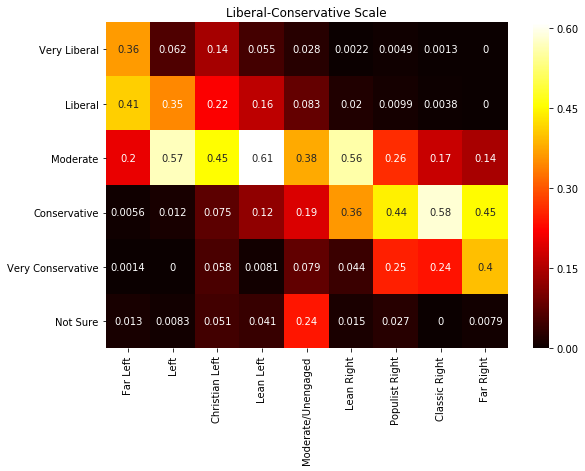

In [24]:
q = ["Very Liberal", "Liberal", "Moderate", "Conservative", "Very Conservative", "Not Sure"]
crosstab_label("ideo5_2018","Liberal-Conservative Scale",q)

#### Observations

1. The Populist Right doesn't identify as conservative as the Classic Right.
2. Almost 20% of the Moderate/Unengaged say they are 'Conservative' while 12% of the Lean Left say they are 'Conservative.' Maybe the true center is between those two?

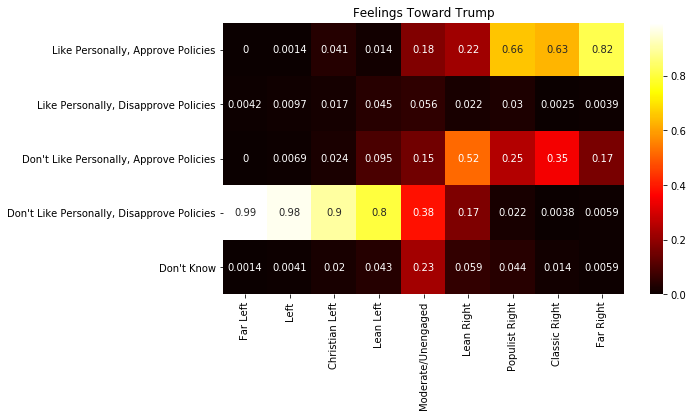

In [25]:
q = ["Like Personally, Approve Policies", "Like Personally, Disapprove Policies", "Don't Like Personally, Approve Policies",\
     "Don't Like Personally, Disapprove Policies", "Don't Know"]
crosstab_label("trumpfeel_2018","Feelings Toward Trump",q)

#### Observations

1. The Populist right views Trump slightly more favorably than the Classic Right. 
2. A plurality of Moderate/Unengaged don't like Trump personally or his policies, but seem to be split.
3. Nobody seems to like Trump personally but disapprove of his policies. No surprise there. 

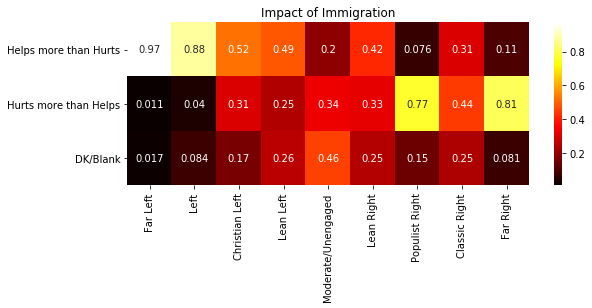

In [26]:
q = ["Helps more than Hurts", "Hurts more than Helps","DK/Blank"]
crosstab_label("immigration_help_2017","Impact of Immigration",q)

#### Observations

The Classic Right is much more split on the impact of immigration than the Populist and Far Right, which both agree is hurts more than helps.

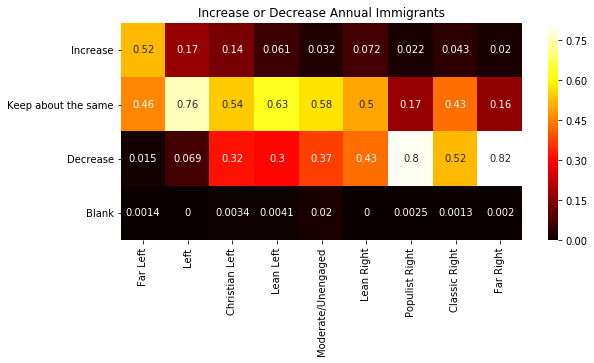

In [27]:
q = ["Increase", "Keep about the same", "Decrease", "Blank"]
crosstab_label("immi_num_2018","Increase or Decrease Annual Immigrants",q)

#### Observations

1. Once again, the Populist and Far Right are united on decreasing the number of immigrants, while the Classic Right is more split.
2. Only the Far Left wants to increase the number of immigrants by any margin.

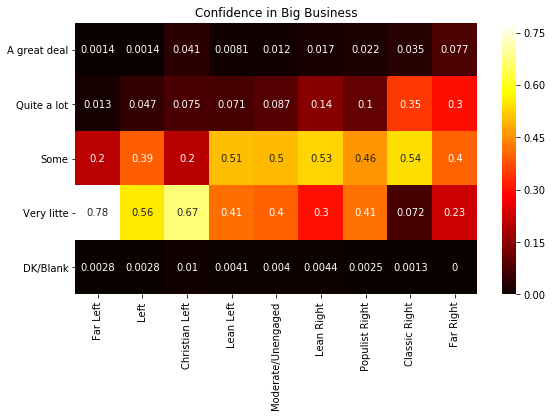

In [28]:
q = ["A great deal", "Quite a lot", "Some", "Very litte", "DK/Blank"]
crosstab_label("inst_business_2018","Confidence in Big Business",q)

#### Observations

1. The Left has more confidence in Big Business than Christian Left or Far Left. Maybe because they work there? 
2. The Classic Right generally has the most confidence in Big Business, more so than the Far Right.
3. Essentially nobody has 'a great deal' of confidence in Big Business.

*Note: The next plot uses the percentage of each race in each label, not the percentage of each label in each race. (I.e. the sum of rows equals 1 instead of columns summing to 1.)*

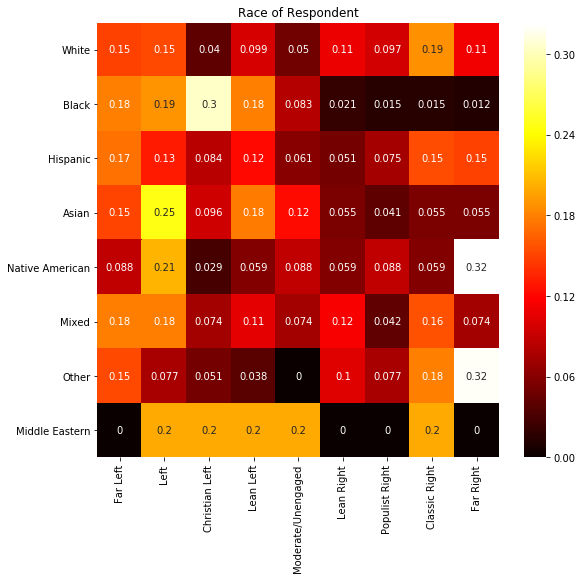

In [29]:
q = ["White", "Black", "Hispanic", "Asian", "Native American", "Mixed", "Other", "Middle Eastern"]
crosstab_label("race_2018","Race of Respondent",q, switch_axis=True)

#### Observations

1. Keep in mind this plot doesn't reflect the total number of respondents of each race. For example, there are more total Whites than Blacks in the Christian Left, but not as a percentage of their respective races. 
2. A noticable chunk of the Christian Left is Black, with most other Blacks being left of center.
3. Hispanics are much more split between the right and left than I would have otherwise thought. Maybe has to do with being first or second generation Americans?
4. A large portion of Asians are in the Left cluster and most are left of center.

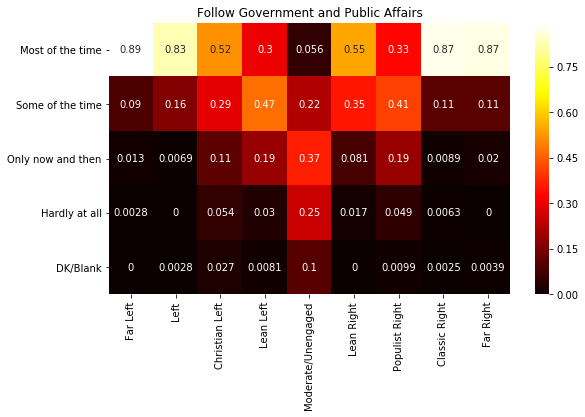

In [30]:
q = ["Most of the time", "Some of the time", "Only now and then", "Hardly at all", "DK/Blank"]
crosstab_label("newsint_2018","Follow Government and Public Affairs",q)

#### Observations

1. Unsurprisingly, the extremes of each side follow politics the closest.
2. The Populist Right follows politics less than the Lean Right.
3. Less than 25% of the Moderate/Unengaged follow politics 'Some of the time', with almost all following less. This is good evidence that the label is named appropriately. 

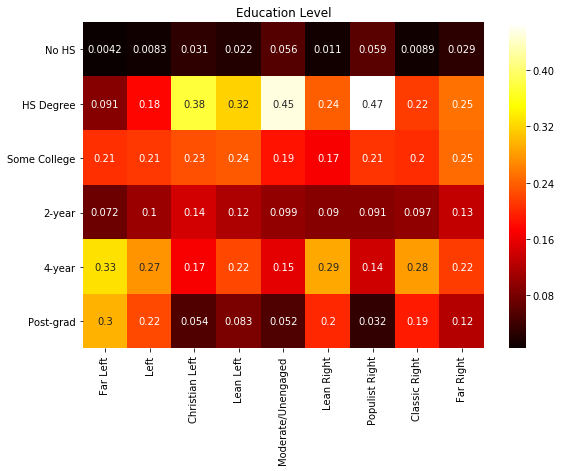

In [31]:
q = ["No HS", "HS Degree", "Some College", "2-year", "4-year", "Post-grad"]
crosstab_label("educ_2016","Education Level", q)

#### Observations

1. The Populist Right is much less education than average.
2. Education levels seems to be a big distinction between the Christian Left and the Left/Far Left.
3. Almost everybody on the Far Left has gone to college, and they have the highest percentage of post-graduates.

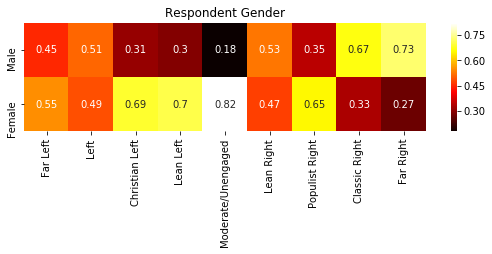

In [32]:
q = ["Male", "Female"]
crosstab_label("gender_2018","Respondent Gender",q)

#### Observations

1. A surprisingly large proportion of the Moderate/Unengaged are female.
2. A larger proportion of the Populist Right is Female than Male. I would have expected the opposite. Maybe tied to levels of engagement?
3. It seems that men are generally more extreme in their views than women. 

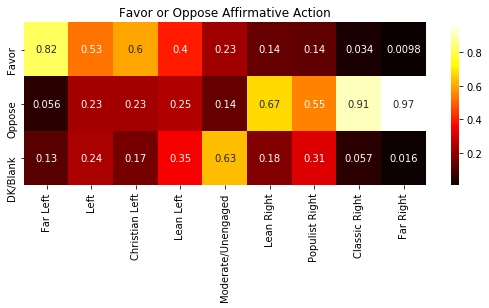

In [33]:
q = ["Favor", "Oppose", "DK/Blank"]
crosstab_label("affirmact_gen_2016","Favor or Oppose Affirmative Action",q)

#### Observations

1. The Populist Right isn't as uniformly opposed to affirmtative action as the other right-leaning clusters. 
2. The Christian Left is more favorable to affirmative action than the Left or Lean Left. Maybe becaue of higher percentage of African-Americans in that group?

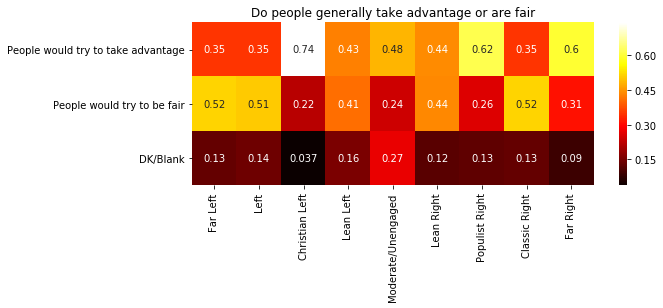

In [34]:
q = ["People would try to take advantage", "People would try to be fair", "DK/Blank"]
crosstab_label("fair_people_2016","Do people generally take advantage or are fair", q)

#### Observations

1. I chose this question because I saw that it was a big distinction between Christian Left and Left. That bears out here.
2. Because of highest values in Christian Left, Populist Right, and Far Right, I would guess this question is somewhat income-related?

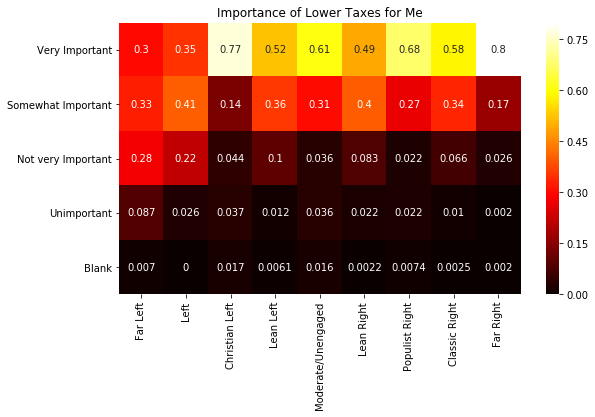

In [35]:
q = ["Very Important", "Somewhat Important", "Not very Important", "Unimportant", "Blank"]
crosstab_label("tax_goal_you_2018","Importance of Lower Taxes for Me",q)

#### Observations

The Christian Left is much more inclined to want lower taxes for themselves than any other group. Probably because of lower incomes themselves than a certain ideology?

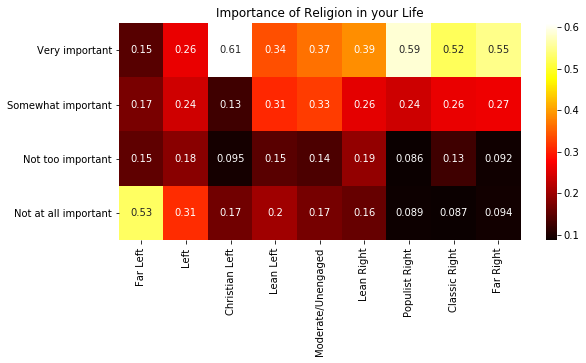

In [36]:
q = ["Very important", "Somewhat important", "Not too important", "Not at all important"]
crosstab_label("pew_religimp_2018","Importance of Religion in your Life", q)

#### Observations

1. This is part of where I decided on the name "Christian Left" since religion is a much bigger part of their lives (even more than some clusters on the right).
2. The Far Left is the only cluster with majority saying religion is not at all important.

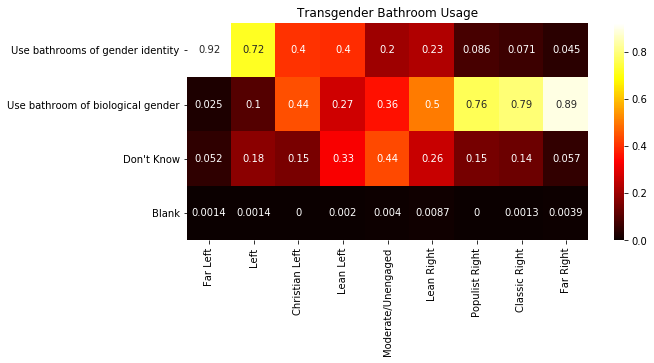

In [37]:
q = ["Use bathrooms of gender identity", "Use bathroom of biological gender", "Don't Know", "Blank"]
crosstab_label("view_transgender_2016","Transgender Bathroom Usage",q)

#### Observations

I chose to look at this question because I was curious on how the Christian Left would answer. They seem to be much more split than others to their left, maybe because of the religous influence on gender views?

## 5.3 Biggest Differences

In order to figure out which questoins to include in the above section, I created a series of functions that provide the survey questions with the biggest differnce between 2 clusters. I define 'difference' as the average absolute difference between clusters for each possible answer for a given question. 

In [38]:
def mean_diff_labels(colname, labela, labelb):
    groupa = pd.Series(data[data['Label'] == labela][colname].values.ravel())
    groupb = pd.Series(data[data['Label'] == labelb][colname].values.ravel())
    return np.mean(abs(groupa.value_counts(normalize=True).sort_index() - groupb.value_counts(normalize=True).sort_index()))

def mean_diff_labels_all(labela, labelb):
    
    diffs = pd.Series(index=data.columns)
    
    for i, colname in enumerate(data.columns):
        diffs[colname] = mean_diff_labels(colname, labela, labelb)

    return diffs

### Example

Below are the 20 questions that are the most different between the Christian Left and the Left. By changing 'a' and 'b' below, we can see these questions for any pair of clusters.

In [39]:
a = "Christian Left"
b = "Left"
groupdiffs = mean_diff_labels_all(a, b)
groupdiffs.sort_values(ascending=False)[:20]

C:\Users\James\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


Col_name                    Year  Type      Section          
savings_2017                2017  Cat       RespInfo             0.338235
SOCIAL_CONFORMITY_2_2016    2016  Cat       Social_Conformity    0.280959
SOCIAL_CONFORMITY_3_2016    2016  Cat       Social_Conformity    0.262677
fair_people_2016            2016  Cat_O_DN  Trust                0.261352
immigration_help_2017       2017  Cat_O_DN  Immigration          0.235885
pk_house_baseline           2011  Cat       Knowledge            0.227423
view_transgender_2016       2016  Cat       Cultural             0.226620
trust_people_2016           2016  Cat_O_DN  Trust                0.222420
selfdescr_ccap_6_baseline   2011  Cat       PolIden              0.222069
latetalk_5_baseline         2011  Cat       MediaConsump         0.221181
pew_bornagain_2018          2018  Cat       RespInfo             0.220012
tax_goal_you_2018           2018  Cat_O     Taxes                0.217656
org_membership_3_baseline   2011  Cat       OrgMem

# 6. Conclusion and Future

I was pleasantly surprised how defined the different clusters were and how well they map to existing political groups in the real world. There is certainly plenty of more insight to be gleaned from these clusters as well. In the future I may want to look into removing more 'Section-skipping' components to see if that allows more clusters to form without being warped. I may also want to try different clustering algorithms to see how well they perform. Finally, I could try bucketing the questions into larger Sections so that there are fewer components after the MCA is completed. 